In [1]:
import sys 
#sys.path.append("/Users/macbook/Documents/GitHub/Leishmania")
from sim_leish import simulation
import class_leish as cll
import multiprocessing as mp
import itertools
import csv

## Primeras simulaciones

Los parámetros de nuestra función son:
```
Parameters:
        num_leish (int): initial leishmania population
        num_macro (int): initial macrophage population
        p (float): probability that leish will infect macrophage following
                   phagocytosis
        recruit_rate (float): percent of initial population of macrophages that
                              get recruited
        days (int): number of days that simulation will run, default is 70 days
                    (10 weeks)
        steps (int): number of "steps" in a day, default is 96 for 15 minute steps
        len_infection (int): days infected before releasing leish
        size (int): space considered will be grid size x size
        draw (bool): default False. If True, draws space at the end of every day.
        save (bool): default False. If true, save graphs.

```

Nos estamos basando en el experimento de ratones, donde se introducen originalmente 100 leishmanias. En las gráficas del experimento, en la semana 0, se tienen en promedio 8,000 macros por lesión, y el mayor número que se alcanza es alrededor de 50,000. 

Variamos la probabilidad de infección y la tasa de reclutamiento de macrófagos, para ver si podemos recrear los resultados del experimento de los ratones y con qué parámetros lo hacemos.

Correremos 70 días, en el artículo se tienen los datos en las gráficas de leish hasta semana 11 y de macros hasta semana 9, corremos hasta semana 10 para comparar. Para el tiempo de un paso, consideramos que los promastigotes son ovalados y miden entre 5-14 µm de largo, amastigotes son redondos de entre 2-4µm. Según la literatura, tomaría al menos 20 minutos fagocitar promastigotes, y aprox 5 minutos fagocitar amastigotes. Nuestros pasos están definidos en base a un "evento" de fagocitación, 15 minutos cada paso en promedio. 

Consideramos que el tiempo que se tardan en liberar las leishmanias es de 28 días, y que el número de leishmanias que se liberan por cada una es 40 (no está como parámetro, solo en el código). Consideramos que salen en la segunda y tercera vecindad de Moore de la coordenada central del macrófago. 

Para el tamaño, queremos recrear el sitio de lesión de 1mm. Asumiendo que nuestra representación de una leishmania por un cuadrito es un amastigote (2-4µm) (aunque inicialmente se introducen promastigotes), tendríamos un espacio de entre  250 y 500 de tamaño. Podemos considerar 500, ya que nuestros macros no están a escala con las leishmanias (deberían ser entre 5 y 10 veces más grandes, y son 3 veces más grandes). Entonces, asumimos que 500x500 refleja el sitio de lesión, con las 100 leishmanias y 8000 macros iniciales. Sin embargo, es un espacio que toma demasiado tiempo para correr, y mientras afinamos valores usaremos un espacio de 100x100, con 4 leishmanias y 320 macros. 

En el experimento de los ratones, se tienen 20,000 macrófagos por lesión al final de la semana 9, nosotros deberíamos tener $\frac{20000}{25} = 800$ al final de la simulación. El decrecimiento en la población de macros tarda alrededor de 2 semanas después del máximo, 

### Estimaciones:

Nuestra $p$ representa la probabilidad de que un macrófago se infecte al fagocitar una leishmania. Según lo que hemos leído acerca de los macrófagos tipo M1 y tipo M2, los tipo M2 son los que permiten el crecimiento de leishmanias, de modo que nuestra p se puede pensar como: 

$$p \approx \frac{|M2|}{|M1+M2|}$$


Habría que confirmar que la tasa de diferenciación entre los dos tipos nos permite considerar la probabilidad en cualquier momento de que sean de ese tipo, o si sería mejor darles un tipo al inicio y asignarles una probabilidad de que se diferencien al otro tipo en cada paso. Encontré un dato de M1/M2 ~4 en tejido adiposo, y otro de M1/M2 ~1.5 en orejas de ratones (creo, era el control de otro experimento, ese es $p = 0.4$). Eso nos da un estimado de $p$ entre $0.2$ y $0.4$. De ahí consideramos los valores:

$$p = [0.1, 0.2, 0.4]$$ 

Donde esperaríamos que 0.2 sea el más adecuado. Para la tasa de reclutamiento de macros, no he encontrado datos, pero los datos de los ratones sugieren que es un crecimiento exponencial considerable. Empezando con 320 macros, si queremos alcanzar $\frac{50000}{25} = 2000$, y reclutando 7 días, $r = 0.3$ nos daría un buen estimado. Probaremos con los valores: 

$$ r = [0.2, 0.3, 0.5] $$ 

Estos valores nos permitirán ir refinando los parámetros del modelo, para ver si refleja la realidad de los experimentos. 

### Resultados:
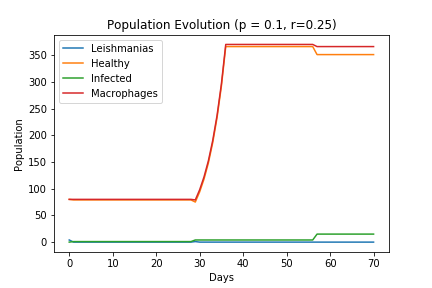
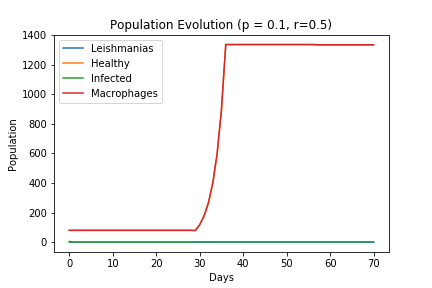
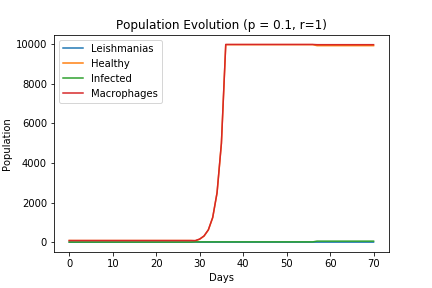
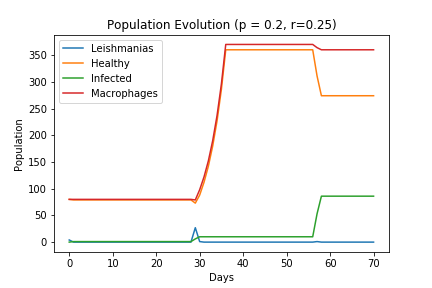
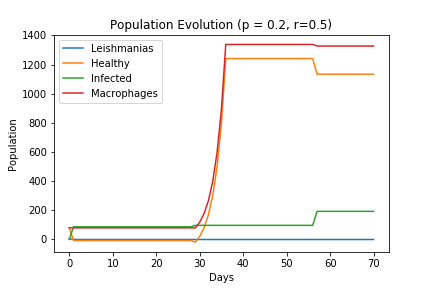
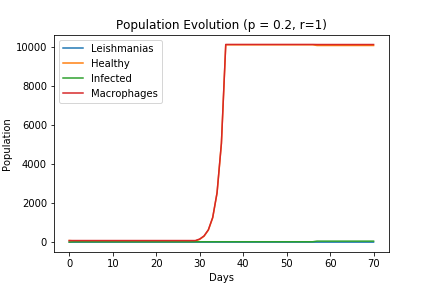
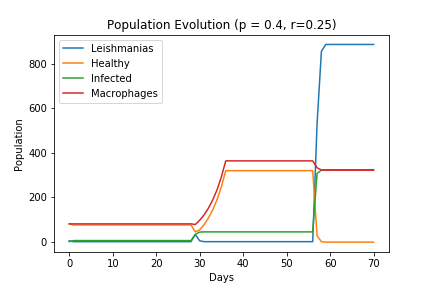

### Pendientes

Nos falta averiguar qué pasa con los macrófagos reclutados. Las gráficas del experimento muestran que la cantidad de ellos disminuye rápidamente cuando termina el periodo inflamatorio, pero no sabemos exactamente con qué tasa lo hacen. Sin modificar la cantidad de macros, no podemos reflejar el comportamiento que queremos. Siento que habría que subir la cantidad de leish necesarias para la infección. 

In [2]:
p = [0.1, 0.2, 0.4]
r = [0.25, 0.5 ,1]
inputs = list(itertools.product(p,r))

def sim(p,r):
    simulation(4, 80, p, r, size=100, save=True)
    return

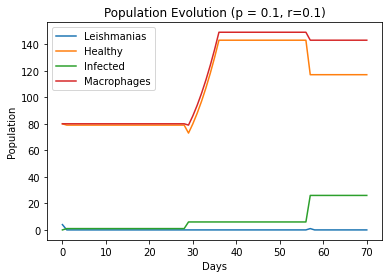

Leishmanias = 0 
Macrophages = 143
151.91  seconds


In [4]:
simulation(4, 80, 0.1,0.1, size=100, save=False)

Leishmanias = 0 
Macrophages = 80Leishmanias = 0 
Macrophages = 80

87.31  seconds
87.31  seconds
Leishmanias = 0 
Macrophages = 80
87.59  seconds
Leishmanias = 0 
Macrophages = 368
256.32  seconds


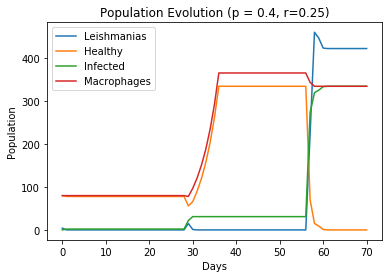

Leishmanias = 423 
Macrophages = 335
262.27  seconds


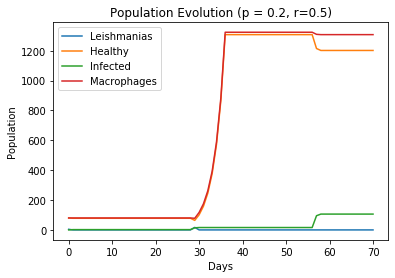

Leishmanias = 0 
Macrophages = 1308
790.59  seconds


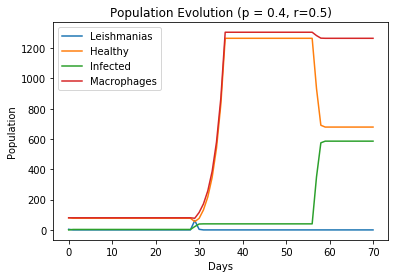

Leishmanias = 0 
Macrophages = 1265
706.16  seconds


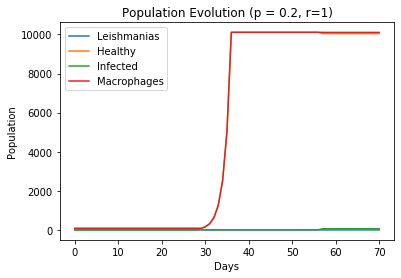

Leishmanias = 0 
Macrophages = 10103
4491.56  seconds


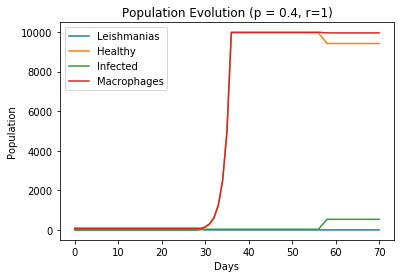

Leishmanias = 0 
Macrophages = 9951
4303.43  seconds


In [3]:
with mp.Pool(4) as pool:
    pool.starmap(sim,inputs)